## Missingno, a Python library to visulize missing values

### Author: Jiahao Lai jl6274  / Yuyang Zhuo yz4399

### Introduction:

Cleaning data always take more than half of the time in a model-fitting project. And how to deal with missing data is a major problem when cleaning data. Here, missingno Python library provides various ways to visualize missing data and help users to dig into the reasons why data are not complete. 

There are 4 visualization methods included in missingno:

        - matrix 
        - bar
        - heatmap
        - dendrogram 

We will describe each of them in the sections below.

### Installation:

In [1]:
! pip install missingno

### Package version:

In [2]:
import missingno as msno
msno.__version__

'0.5.1'

### Load the package and data:

Here we also load pandas and numpy to help read the dataset.

In [3]:
import pandas as pd
import numpy as np

This cvs dataset is called Affordable Housing Production by Building which is downloaded from NYC Opendata website. This dataset records the reports on buildings, units, and projects after 01/01/2014. Several columns in this dataset contains missing values and we will utilize this to show how missingno works.

In [4]:
dt = pd.read_csv('/Users/brett/Desktop/5702-EDA & visulization/cc/Affordable_Housing_Production_by_Building.csv')

### General attributes:

The following attributes works for all 4 methods.

|Attribute|Description|Defaults|
|---|---|---|
|figsize|Size of the figure to display|(20,12)|
|fontsize|Figure's font size|16|
|labels|Whether to display column names|True|
|inline|Return plotting instead of visulizetion|True|


### 1. Matrix

The matrix function in missingno library display the dense of the data and it is easy to 
see the pattern of the missing values for all columns. 

Matrix's attributes:

|Attribute|Description|Defaults|
|---|---|---|
|sparkline|Draw the sparkline|True|
|freq|Display choice of offset for time series data||
|width_ratios|The ratio of the width of the matrix|(15,1)|
|color|color of bar|(0.25, 0.25, 0.25)|

<AxesSubplot:>

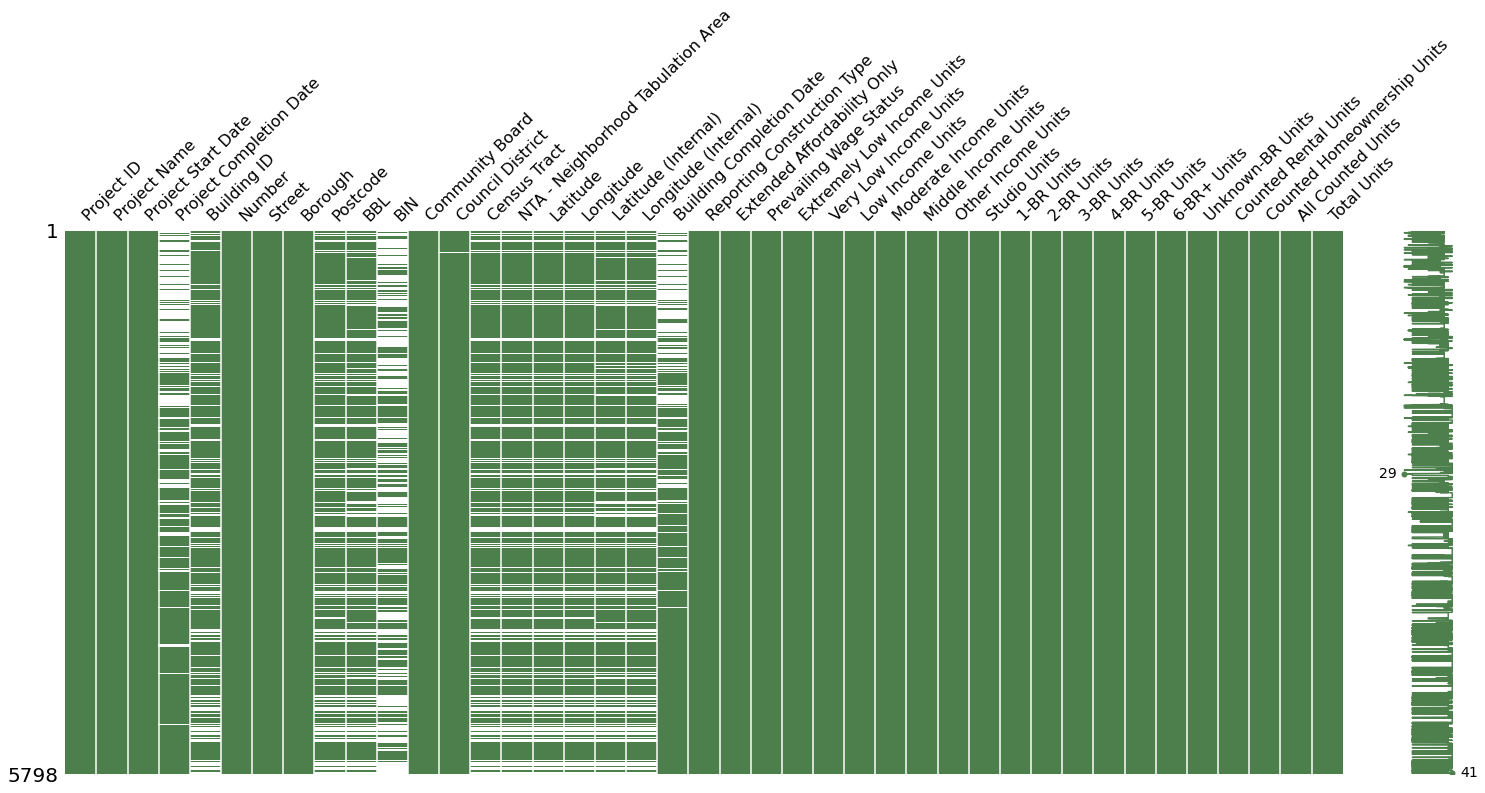

In [5]:
msno.matrix(dt,color = (0.3,0.5,0.3),width_ratios = (20,1))

Here we observe the missing value matrix graph for the all dataset(5798) samples, and we can have general ideas on the missing values. 

Project Completion date, building id, postcode, bbl, bin, Census tract, nta, latitude, longditude, latitude(internal), longditude(internal) and building completion date contains missing value. And BIN columns have highest percentage of missing value.Building completion date's data is more complete as we look down. We can have a guess: this may because of this samples are sorted by date of project started.The older the project, the higher possibility that the building is completed.

Now we zoomin the graph by show parts of the data.

<AxesSubplot:>

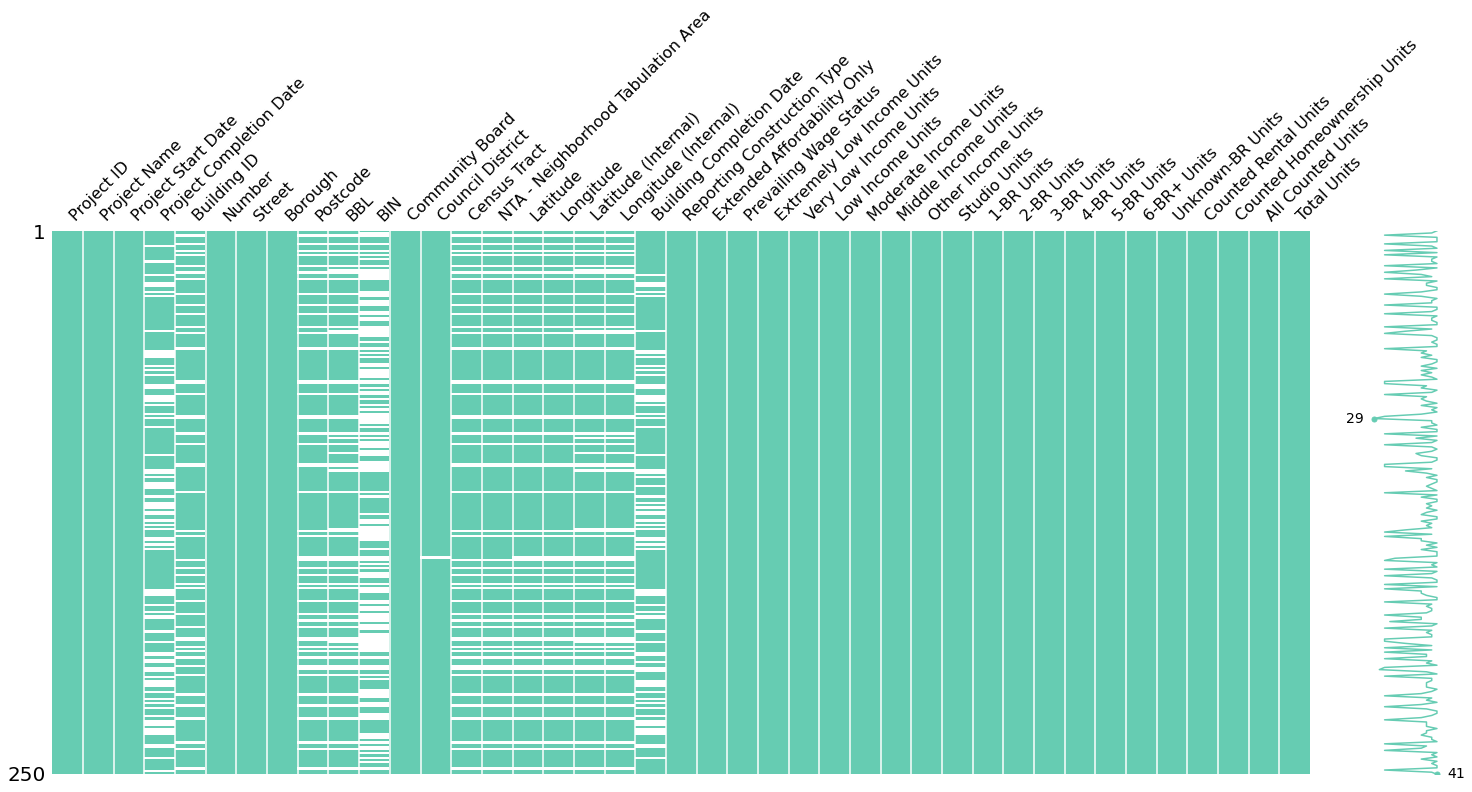

In [6]:
msno.matrix(dt.sample(250),color = (0.4,0.8,0.7))

It is obvious that when Building ID is empty, then  postcode，bbl ，bin，census，nta, latitude, longditude, latitude(internal)and longditude(internal） are also empty.Also, it seems that Project Completion Date and Building Completion Date have the same missing pattern. To confirm this, we will put those two columns together.

In [7]:
dt2 = dt.loc[:,["Project Completion Date","Building Completion Date"]]

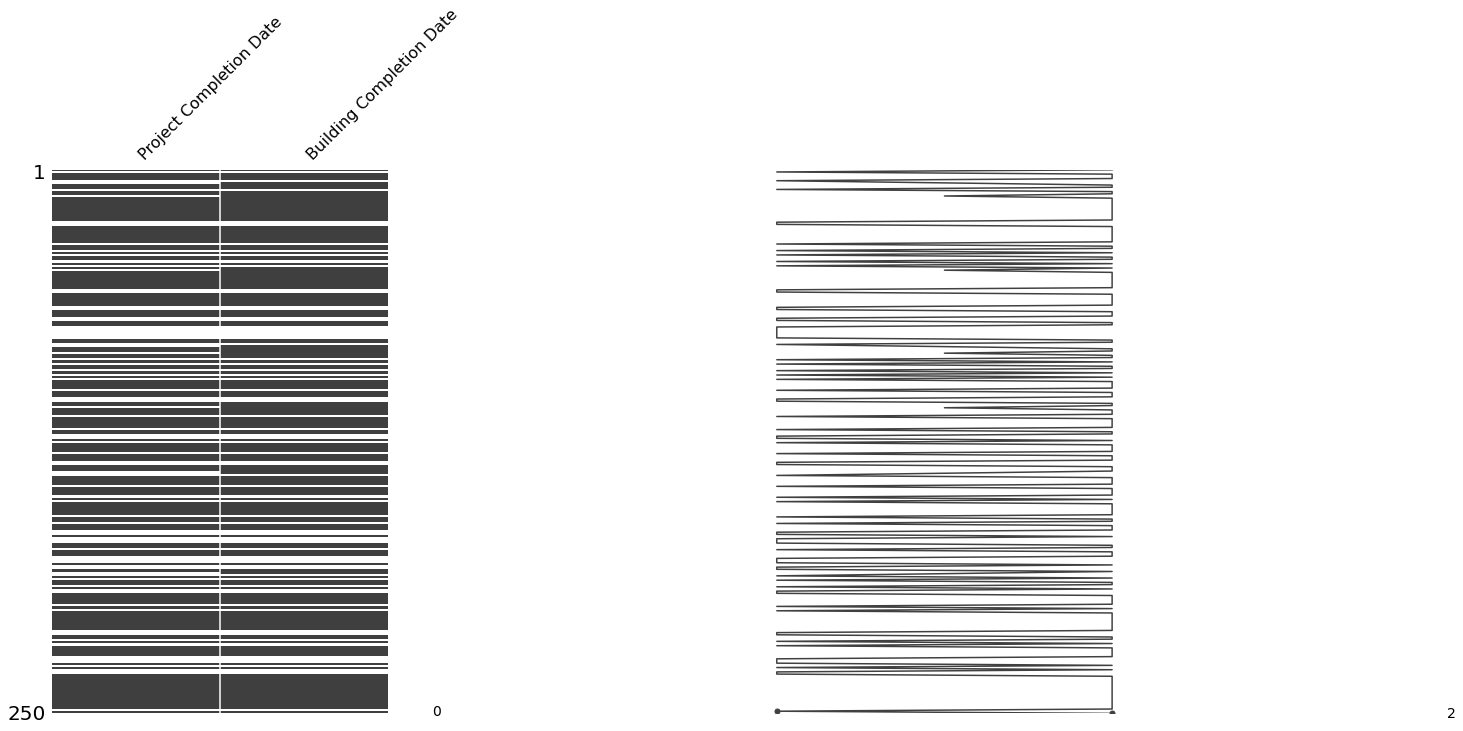

In [8]:
msno.matrix(dt2.sample(250),width_ratios = (1,3));

### 2. Bar

The bar function will simply return the bar plot of the percentage of nullity in all columns.

Following are the attributes for bar function.

|Attribute|Description|Defaults|
|---|---|---|
|log|set into logarithmic scale|False|
|color|color of bar|(0.25, 0.25, 0.25)|

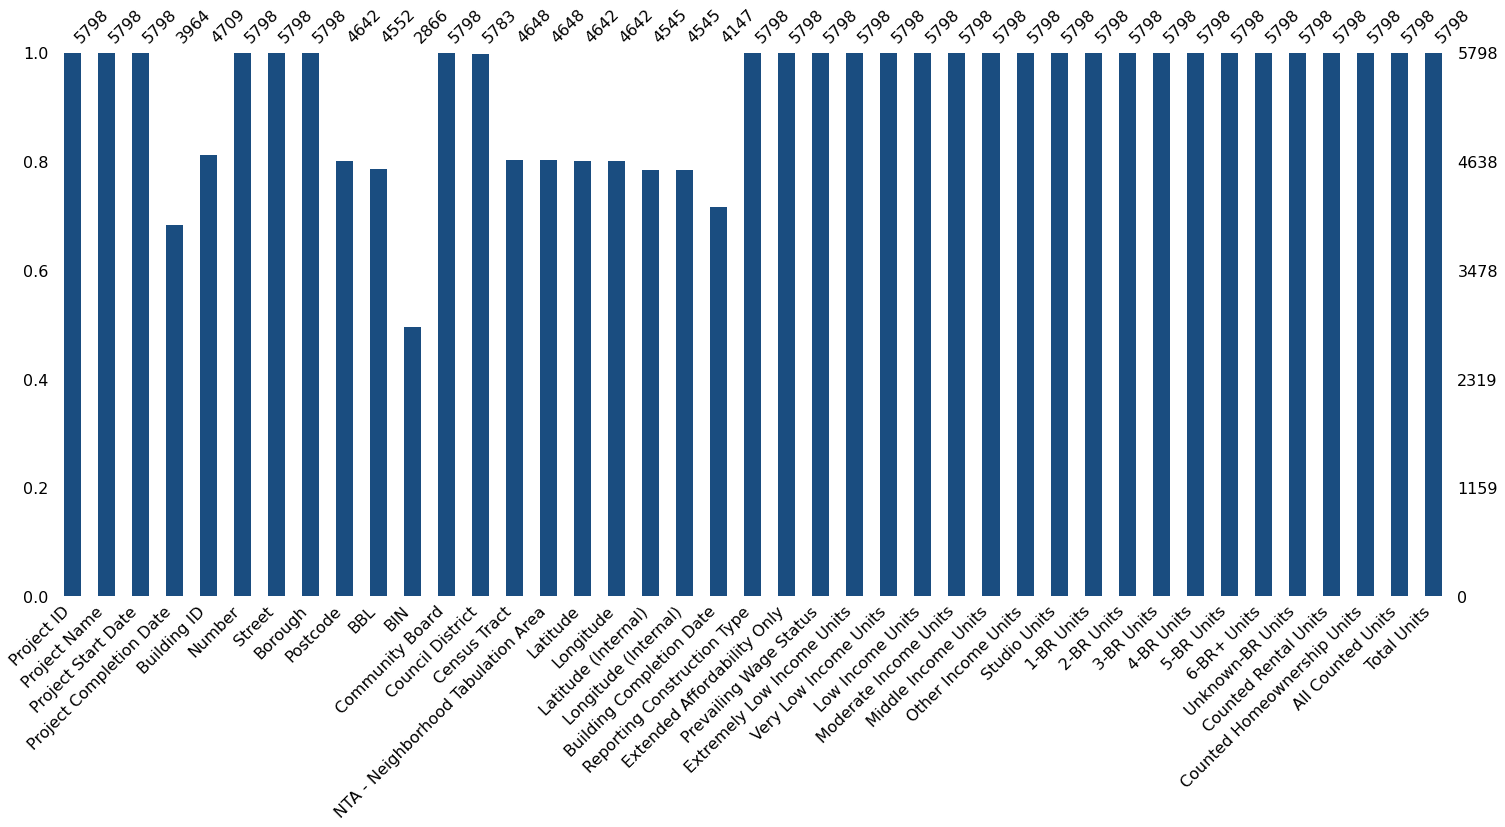

In [9]:
msno.bar(dt,color = (0.1,0.3,0.5));

Above are the bar plot for the Affordable Housing Production by Building dataset. It is obvious that BIN columns have the highest percentage of nullity.

Also, Census Tract and NTA have the exact same number of missing value, therefore we could guess that those two columns have the same pattern of nullity. 

### 3. Heatmap

The missingno heatmap measures nullity correlation, identify if there is a relationship in the presence of null values between each of the columns:

* Nullity correlations close to  1: indicate that the appearing of null values in one column is correlated with the presence of null values in another column. If one variable appears null values, then the other definitely also does.


* Nullity correlations close to -1: as opposed to before, indicate that if one variable appears null values, then the other definitely does not appear null values.


* Nullity correlations close to  0: then there is little to no relationship between the presence of null values in one column compared to another.

Following are the attributes for heatmap function.

|Attribute|Description|Defaults|
|---|---|---|
|cmap|what matplotlib colormap to use|RdBu|


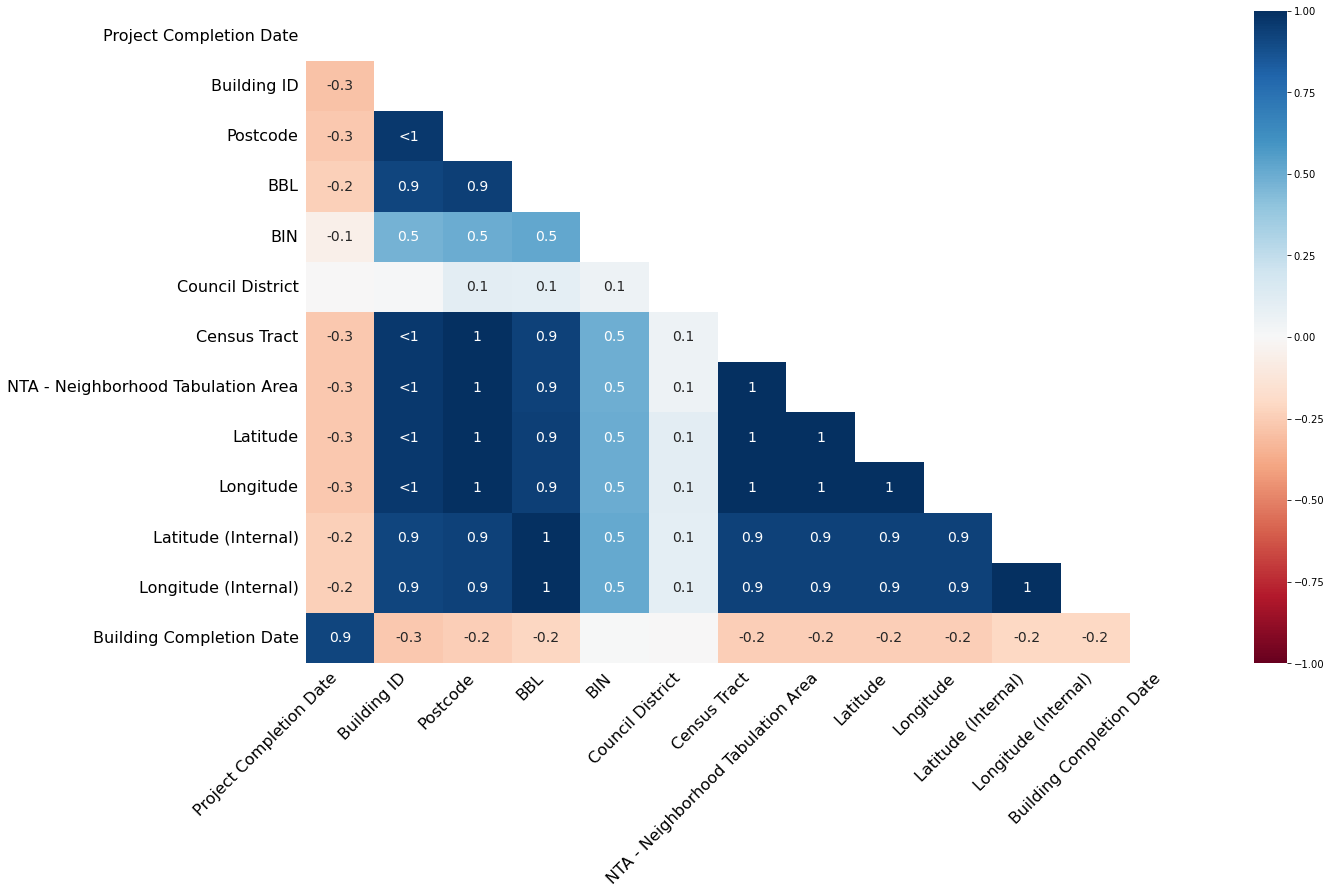

In [10]:
msno.heatmap(dt);

Here we can see that the BBL column is slightly negatively correlated with Project Completion Date column, and strongly positively correlated with Building ID and postcode columns. 

Nullity corrrlation of <1 or >-1 means close to 100% negative or positive. This points to a small number of records in the dataset which are erroneous. 

Note that full variables or empty variables have no meaningful correlation, so these variables will not been shown on the missingno heatmap. For example, Project ID and Total Units are completely filled, so they are silently removed from the visualization.

The explanatory power of missingno heatmap is limited when it comes to larger relationships, and it does not particularly support very large datasets.

### 4. dendrogram

The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

Following are the attributes for dendrogram function.

|Attribute|Description|Defaults|
|---|---|---|
|orientation|The orientation of the dendrogram|top if <=50 columns and left if there are more|
|method|The linkage method scipy.hierarchy uses for clustering|average|

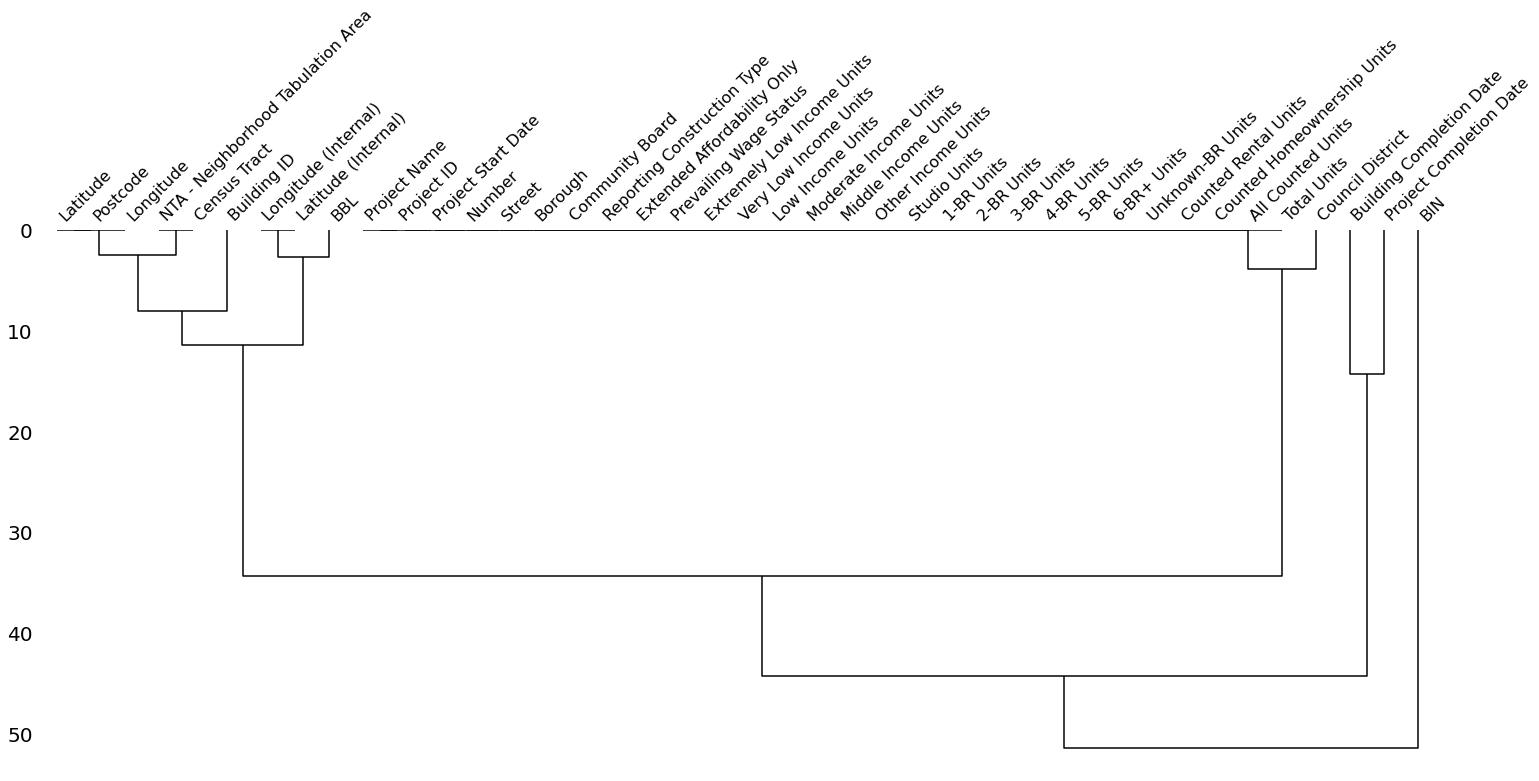

In [11]:
msno.dendrogram(dt);

In the dendrogram plot above, we can see the groups on the right side (Building Completion Date, Project Completion Date, and BIN) has a high degree of null values. 

In the middle part, Project Name, Project ID, Project Start Date, ... ,All counted Units and Total Units are grouped at zero indicating that they are complete.

If we look at left side, Latitude (Internal) and Longtitude (Internal) are grouped together close to zero. BBL is in the same larger branch suggesting that some of the missing values present within that column can be correlated with these two columns.


Dendrogram is able to handle extremely large datasets by simply flipping to a horizontal configuration.

#### References:

https://github.com/ResidentMario/missingno